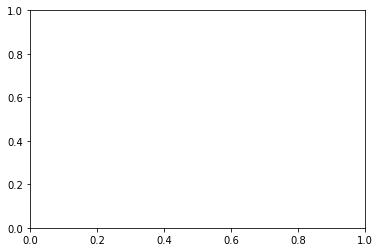

In [1]:
from easy_trilateration.model import *  
from easy_trilateration.least_squares import easy_least_squares  
from easy_trilateration.graph import *  
import pandas as pd

FILEDATE = '2021_12_02_12_08_59'
NUM_OF_ANCHORS = 4

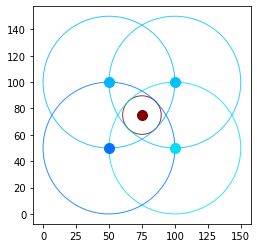

In [2]:
arr = [Circle(x=100, y=100, r=50),  
Circle(x=100, y=50, r=50),  
Circle(x=50, y=50, r=50),  
Circle(x=50, y=100, r=50)]  
result, meta = easy_least_squares(arr)  
create_circle(result, target=True)  
draw(arr)
# print(result, meta)

In [3]:
### REAL DATA
data = pd.read_csv('./uwb_data_multiple/' + FILEDATE + '.csv')
### FAKE DATA
# data = pd.read_csv('C:/Users/user/Documents/CRC2/trilateration/uwb_data_example/straight.csv')
# data = pd.read_csv('C:/Users/user/Documents/CRC2/trilateration/uwb_data_example/circle.csv')
print(data)

     year  month  day  hour  min  sec    ms    anchor     distance  \
0    2021     11   29    15   22   36  5180  ANCHOR_0          nil   
1    2021     11   29    15   22   36  5610  ANCHOR_0          nil   
2    2021     11   29    15   22   36  7610  ANCHOR_0          nil   
3    2021     11   29    15   22   36  9610  ANCHOR_0    1.6113845   
4    2021     11   29    15   22   37  1610  ANCHOR_0    1.6626489   
..    ...    ...  ...   ...  ...  ...   ...       ...          ...   
628  2021     11   29    15   23   12  9590  ANCHOR_0   0.93685144   
629  2021     11   29    15   23   13  1590  ANCHOR_2     7.218403   
630  2021     11   29    15   23   13  1590  ANCHOR_1    5.0449076   
631  2021     11   29    15   23   13  1590  ANCHOR_3    3.8223538   
632  2021     11   29    15   23   13  1590  ANCHOR_0   0.93685144   

            dirX           dirY          dirZ  
0            nil            nil           nil  
1            nil            nil           nil  
2            ni

In [4]:
def is_same_time(data1, data2):
    return data1[['hour', 'min', 'sec', 'ms']].equals(data2[['hour', 'min', 'sec', 'ms']])
    
def is_dist_valid(data):
    return data['distance'][0] != 'nil' and data['distance'][0] != ' nil'

def getAnchorNum(data):
    anchor_name = data['anchor'][0]
    anchor_num = int(anchor_name[-1])
    return anchor_num

In [5]:
# nodes: [(x1, y1), ... ]
anchors = [_ for _ in range(NUM_OF_ANCHORS)] 

def setAnchor(anchor_number, x, y):
    anchors[anchor_number] = (x, y)
    return

In [6]:
coord_x = []
coord_y = []

def getIntersectionPoint(anchor_and_dist):
    arr = []
    for (anchor, dist) in anchor_and_dist:
        x, y = anchors[anchor]
        arr.append(Circle(x, y, dist))

    result, meta = easy_least_squares(arr)  
    coord_x.append(result.center.x)
    coord_y.append(result.center.y)


In [7]:
##### REAL DATA #####
setAnchor(anchor_number=0, x=0, y=0)
setAnchor(anchor_number=1, x=3.84, y=0)
setAnchor(anchor_number=2, x=3.51, y=5.61)
setAnchor(anchor_number=3, x=0, y=5.52)

tmp_data_arr = []

# for data size check
dist_not_valid = 0
time_valid_data = 0
valid_data = 0

for i in range(data.shape[0]):
    data0 = data[i:i+1].reset_index(drop=True)
    
    if not is_dist_valid(data0):
        dist_not_valid += 1
        pass

    if (len(tmp_data_arr)==0 or is_same_time(data0, tmp_data_arr[-1])) and is_dist_valid(data0):
        time_valid_data += 1
        tmp_data_arr.append(data0)
    
    elif len(tmp_data_arr) > 2:
        # print(tmp_data_arr)
        valid_data += len(tmp_data_arr)

        arr = []
        for tmp in tmp_data_arr:
            anchor_num = getAnchorNum(tmp)
            dist = float(tmp['distance'][0])
            
            arr.append((anchor_num, dist))

        # print(arr)
        getIntersectionPoint(arr)
    
        tmp_data_arr = []
        
    else:
        tmp_data_arr = []

print(dist_not_valid, time_valid_data, valid_data, data.shape[0])

21 439 303 633


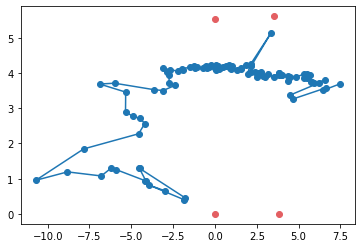

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

x = coord_x
y = coord_y

ax.plot(x, y, marker='o')
# plt.title('Trajectory')

# plot anchors
for x, y in anchors:
    ax.plot(x, y, color= '#e35f62', marker='o')

plt.show()